## 1. DATA Cleaning

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np

st1 = pd.read_csv('train1.csv') #
st2 = pd.read_csv('train2.csv')
st3 = pd.concat([st1,st2])

/Users/linzexiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


### Distribution of the score

It seems like distributed normally, like a bell shape.
Then it is easy to standarlize.

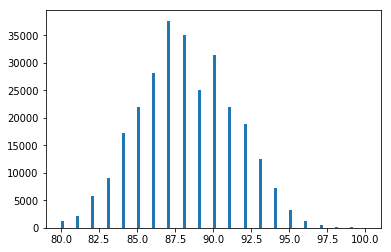

In [3]:
st4 = st3.loc[:,['description', 'points']]
plt.hist(st4['points'], bins = 100)
plt.show()

#### This is one of the sample input data for our model (description)

In [4]:
dict1 = st3.iloc[1,2]
print(dict1)

Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.


#### Append all sentence into one string to make our embedding dictionary

#### dict1 part was writen as csv for save point 

In [ ]:
#### This code is used only once to create word dictionary. ####
#st3.iloc[1,2] + "" + st3.iloc[2,2]
dict1 = ""
for i in range(len(st3.iloc[:,2])-1):
    dict1 = dict1 + " " + st3.iloc[i,2]

In [6]:
text_file = open("Output.txt", "w")

text_file.write(dict1)

#dict1 = text_file.read()

text_file.close()

In [7]:
text_file = open("Output.txt", "r")
dict1 = text_file.read()
text_file.close()

In [8]:
dict1[:100]

' This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy '

## drop all simples (non-alphabet)

#### Cleaning of the string
Want to remove all weird and irrelevant signs

In [9]:
def cleanstring(sentence):
    sentence = sentence.lower() # Uncapitalize all the word
    sentence = re.sub(re.compile(r"[.,?!-\/:;“’‘–\\)•(-@[-`{-~—+'”%]"),"", sentence) # replace all symbol into blank space
    sentence = sentence.replace('\n', "")
    cleaned_string = sentence.replace("'s", "")
    return cleaned_string

Note: Number is not needed in the embedding dictionary because Nueral Network takes each input seperately and unsequencely unlike RNN. There are no connection between next or previous word for number. For example: 80% good and 80% bad. The 80% will be calcuated as the same which is wrong. Also 89% and 90% in human context can be understood simliar but in embedding dictionary are two unique input.

In [10]:
dict2 = cleanstring(dict1)

### Create a dictionary which count how many times a word shows up

In [20]:
dict3 = dict2.split(" ")
word_times = {}
for word in dict3:
    if any(char.isdigit() for char in word):
        pass
    else:
        if word in word_times:
            word_times[word] += 1
        else:
            word_times[word] = 1            
word_times.pop("")

98728

In [21]:
words = list(word_times.keys())
times = list(word_times.values())
word_times1 = pd.DataFrame({"Word":words, "Times":times})
word_times2 = word_times1.sort_values(by=["Times"], ascending=False) 

#### Take Top 10000 apparent words as input vector

In [22]:
word_times3 = word_times2[:10000]

In [23]:
word_times3.to_csv("embedded_dict.csv")

#### Deep copy

In [24]:
st3_copy = st3.copy()

#### Add all sentences into one list And clean each sentence

In [25]:
sample_data = [st3_copy.iloc[0,2].split()]
for i in range(len(st3_copy.iloc[:,2])-1):
    sample_data += [st3_copy.iloc[i+1,2].split()]

#### Replace all non alphabet values in words 

In [26]:
for i in range(len(sample_data)):
    for t in range(len(sample_data[i])):
        sample_data[i][t] = cleanstring(sample_data[i][t])

### checkpoint

In [28]:
ed1 = open('embedded_dict.csv', "r", encoding='utf8',errors='ignore')
ed2 = ed1.read()
ed1.close()

#### Get the top 10000 words as list from stored file

In [29]:
ed3 = ed2.split('\n')
ed4 = []
for i in ed3[1:-1]:
    temp_ed =i.split(',')
    ed4.append(temp_ed[1])

In [30]:
len(ed4)

10000

#### Create empty matrix with 10000 + 2 * num of sample. Putting scores and index into matrix

In [31]:
sampleX1 = np.zeros(shape=(len(sample_data),len(ed4)+2),dtype=int)

In [32]:
for t in range(len(st4['points'])):
    sampleX1[t,-2] = st4['points'].iloc[t]
    sampleX1[t,-1] = t

In [33]:
len(sampleX1[100])

10002

In [34]:
for n in range(len(sample_data)):
    sentence = sample_data[n]
    sampleX1[-1]
    for word in sentence:
        if word in ed4:
            sampleX1[n,ed4.index(word)] = 1

In [35]:
len(sampleX1[1])

10002

### The computer can not output everything in one file. Need to seperate it then output it.

In [36]:
sa1 = sampleX1[:100000]
sa2 = sampleX1[100000:200000]
sa3 = sampleX1[200000:]

In [37]:
with open('Data1.txt', 'w') as f:
    for item in sa1.tolist():
        f.write("%s\n" % item)
f.close()

In [38]:
with open('Data2.txt', 'w') as g:
    for item in sa2.tolist():
        g.write("%s\n" % item)
g.close()

In [39]:
with open('Data3.txt', 'w') as h:
    for item in sa3.tolist():
        h.write("%s\n" % item)
h.close()